<Figure size 800x600 with 0 Axes>

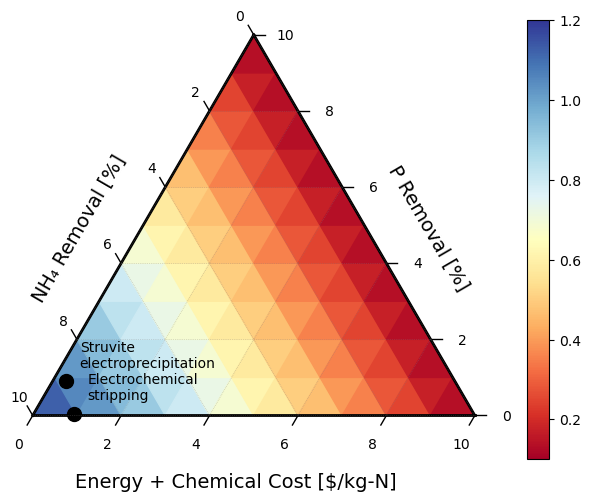

In [ ]:
import pandas as pd
import numpy as np
import ternary
import matplotlib.pyplot as plt

# Ternary documentation: https://github.com/marcharper/python-ternary/blob/master/README.md

# Set scale for ternary plot
scale = 10

# Create dictionary to store LCOW values
data_dict = {}

# Generate LCOW values that:
# - Increase with energy intensity 
# - Decrease with higher NH4 and P removal
for i in range(scale + 1):
    for j in range(scale + 1 - i):
        k = scale - i - j
        # Convert to percentages (0-100)
        x = int((i/scale) * 100) 
        y = int((j/scale) * 100)
        z = int((k/scale) * 100)
        
        # Base LCOW starts at 2
        base_lcow = 0.2
        
        # Add energy cost contribution (0 to 5)
        energy_cost = z * 0.01
        
        # Subtract benefits from removal (up to -1 each)
        nh4_benefit = -0.1 * (x/100)
        p_benefit = -0.1 * (y/100)
        
        # Calculate total LCOW
        lcow = base_lcow + energy_cost + nh4_benefit + p_benefit
        
        # Store in dictionary with tuple in correct order for ternary plot
        # Order needs to be (left, right, bottom) which maps to:
        # (NH4 removal, P removal, Energy Intensity)
        data_dict[(i, j, k)] = lcow

# Create ternary plot
plt.figure(figsize=(8, 6))
fig, tax = ternary.figure(scale=scale)

# Plot heatmap with triangular interpolation
tax.heatmap(data_dict, style="triangular", cmap="RdYlBu", colorbar=True)

# Add labels with contrasting colors
tax.left_axis_label("NH₄ Removal [%]", offset=0.15, color='k', fontsize = 14)
tax.right_axis_label("P Removal [%]", offset=0.15, color='k', fontsize = 14)
tax.bottom_axis_label("Energy + Chemical Cost [$/kg-N]", offset=0.15, color='k', fontsize = 14)

# Add ticks
ticks = [i for i in range(0, scale + 1, 2)]  # 0 to scale in steps of 2
tax.ticks(ticks=ticks, axis='lrb', linewidth=1, multiple=2, offset=0.025)

# Add boundary and gridlines
tax.boundary(linewidth=2.0)
tax.gridlines(color="gray", multiple=2, alpha=0.5)
tax.get_axes().axis('off')

# Add point for struvite electroprecipitation
tax.scatter([(0.3, 0.9, 3.5)], marker='o', color='k', s=100, label='Struvite electroprecipitation')
tax.annotate('Struvite\nelectroprecipitation', (0.3, 0.9, 0.5), xytext=(10, 10), textcoords='offset points')

# Add point for struvite electroprecipitation
tax.scatter([(0.9, 0.05, 0.5)], marker='o', color='k', s=100, label='Electrochemical stripping')
tax.annotate('Electrochemical\nstripping', (0.9, 0.05, 3.5), xytext=(10, 10), textcoords='offset points')

tax._colorbar_label_size = 12
plt.tight_layout()
tax.show()

In [7]:
data_dict

{(0, 0, 0): 2.0,
 (0, 0, 11): 2.55,
 (0, 0, 22): 3.1,
 (0, 0, 33): 3.6500000000000004,
 (0, 0, 44): 4.2,
 (0, 0, 55): 4.75,
 (0, 0, 66): 5.300000000000001,
 (0, 0, 77): 5.85,
 (0, 0, 88): 6.4,
 (0, 0, 100): 7.0,
 (0, 11, 0): 1.89,
 (0, 11, 11): 2.44,
 (0, 11, 22): 2.99,
 (0, 11, 33): 3.5400000000000005,
 (0, 11, 44): 4.09,
 (0, 11, 55): 4.64,
 (0, 11, 66): 5.19,
 (0, 11, 77): 5.739999999999999,
 (0, 11, 88): 6.29,
 (0, 11, 100): 6.89,
 (0, 22, 0): 1.78,
 (0, 22, 11): 2.3299999999999996,
 (0, 22, 22): 2.88,
 (0, 22, 33): 3.43,
 (0, 22, 44): 3.98,
 (0, 22, 55): 4.53,
 (0, 22, 66): 5.080000000000001,
 (0, 22, 77): 5.63,
 (0, 22, 88): 6.180000000000001,
 (0, 22, 100): 6.78,
 (0, 33, 0): 1.67,
 (0, 33, 11): 2.2199999999999998,
 (0, 33, 22): 2.77,
 (0, 33, 33): 3.3200000000000003,
 (0, 33, 44): 3.87,
 (0, 33, 55): 4.42,
 (0, 33, 66): 4.970000000000001,
 (0, 33, 77): 5.52,
 (0, 33, 88): 6.07,
 (0, 33, 100): 6.67,
 (0, 44, 0): 1.56,
 (0, 44, 11): 2.11,
 (0, 44, 22): 2.66,
 (0, 44, 33): 3.21000

/tmp/ipykernel_1276980/3884839804.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nitrogen_removal_literature[['Process Group (2021)', 'Process Group (2024)']].fillna(method='ffill', inplace=True)
/tmp/ipykernel_1276980/3884839804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nitrogen_removal_literature[['Process Group (2021)', 'Process Group (2024)']].fillna(method='ffill', inplace=True)


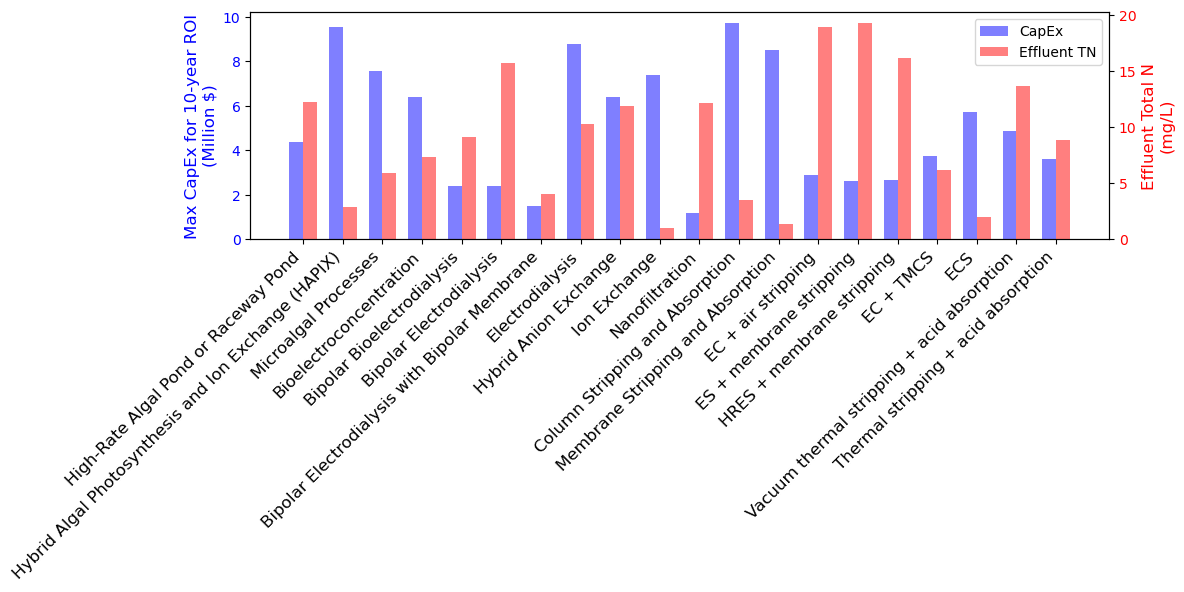

In [17]:
# Read in literature data
nitrogen_removal_literature = pd.read_csv('nitrogen_removal_literature.csv')
nitrogen_removal_literature[['Process Group (2021)', 'Process Group (2024)']].fillna(method='ffill', inplace=True)

# Drop Reverse Osmosis and last 6 entries
nitrogen_removal_literature = nitrogen_removal_literature[~nitrogen_removal_literature['Process 2024'].isin(['Reverse Osmosis'])]
nitrogen_removal_literature = nitrogen_removal_literature.iloc[:-12]

# Create synthetic CapEx data for 10-year ROI
unique_processes = nitrogen_removal_literature['Process 2024'].dropna().unique()
np.random.seed(42)
capex_data = pd.DataFrame({
    'Process': unique_processes,
    'CapEx_10yr_ROI': np.random.uniform(1000000, 10000000, len(unique_processes))
})

# Create synthetic effluent data
effluent_data = pd.DataFrame({
    'Process': unique_processes,
    'Effluent_TN': np.random.uniform(0.1, 20, len(unique_processes))
})

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()

# Set width and positions for bars
width = 0.35
x = np.arange(len(unique_processes))

# Plot CapEx data on left y-axis
ax1.bar(x - width/2, capex_data['CapEx_10yr_ROI']/1e6, width, color='b', alpha=0.5, label='CapEx')
ax1.set_ylabel('Max CapEx for 10-year ROI\n(Million $)', color='b', fontsize = 12)
ax1.tick_params(axis='y', labelcolor='b')

# Plot effluent data on right y-axis
ax2.bar(x + width/2, effluent_data['Effluent_TN'], width, color='r', alpha=0.5, label='Effluent TN')
ax2.set_ylabel('Effluent Total N\n(mg/L)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

# Customize x-axis
ax1.set_xticks(x)
ax1.set_xticklabels(unique_processes, rotation=45, ha='right', fontsize = 12)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()